# Movie Industry Trends

insert pretty picture here, sponsored by microsoft, microsoft logo

Authors: [Christos Maglaras]() and [Jamie Dowat](mailto:jamie_dowat44@yahoo.com)

## Overview

In light of Microsoft's desire to expand their enterprise into the movie sector, we have analyzed various aspects of movie data to help develop some insights to help maximize Microsoft's ROI for their potential startup. 

{PUT SUMMARY OF INSIGHTS HERE}

Since we are both relatively unfamiliar with the business end of the industry, supplementary research on the working of the industry as a whole were considered to help drive and focus our analysis. Access sources HERE.

Data was analyzed from [IMDB](https://www.imdb.com/), [Box Office Mojo](https://www.boxofficemojo.com/), [The Movie Data Base](https://www.themoviedb.org/), and [The-Numbers.com](https://www.the-numbers.com/).
From each of the above 

## Business Problem

picture?

Highlight specific areas of focus
- start up company
- changing industry
- good strategies {use movie terms: release strategy, dump month, etc}

## Unpacking the Data

*Recognize credentials of sources listed above as credible, good data supply, etc



In [29]:
import pandas as pd

We adjusted each of the monetary values to accomodate for inflation. [Here](https://github.com/datadesk/cpi#:~:text=Working%20with%20Python,the%20Bureau%20of%20Labor%20Statistics) is the link to the package info.

In [30]:
# if you do not have this cpi package, you can download as:
# pip install cpi (!pip install cpi if you'd like in your Jupyter notebook)

In [31]:
import cpi
cpi.update() # run to make sure current Consumer Price Index is being used in calculations

In [32]:
########## JAMIE CLEANING CODE ###########

In [33]:
bomMovieGross = pd.read_csv('data/bom.movie_gross.csv.gz')

imdbNameBasics = pd.read_csv('data/imdb.name.basics.csv.gz')

imdbTitleAkas = pd.read_csv('data/imdb.title.akas.csv.gz')

imdbTitleBasics = pd.read_csv('data/imdb.title.basics.csv.gz')

imdbTitleCrew = pd.read_csv('data/imdb.title.crew.csv.gz')

imdbTitlePrincipals = pd.read_csv('data/imdb.title.principals.csv.gz')

imdbTitleRatings = pd.read_csv('data/imdb.title.ratings.csv.gz')

rtMovieInfo = pd.read_csv('data/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')

rtReviews = pd.read_csv('data/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')

tmdbMovies = pd.read_csv('data/tmdb.movies.csv.gz')

tnMovieBudgets = pd.read_csv('data/tn.movie_budgets.csv.gz')

#### kaggle data csv read here ####



### Cleaning Movie Budget data from [The-Numbers.com](https://www.the-numbers.com/)

In [34]:
tnMovieBudgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


The production budget, domestic gross, and worldwide gross columns need to be converted into numbers:

In [35]:
money_cols = ['worldwide_gross', 'domestic_gross', 'production_budget']
tnMovieBudgets[money_cols] = tnMovieBudgets[money_cols].applymap(lambda x: int(x.replace('$','').replace(',','')))

In [36]:
tnMovieBudgets[money_cols].head(1)

,worldwide_gross,domestic_gross,production_budget
0,2776345279,760507625,425000000


Then, we adjusted the dates to create separate columns for month and year released:

In [37]:
tnMovieBudgets['release_date'] = pd.to_datetime(tnMovieBudgets['release_date'], errors='coerce') # what does coerce do?
tnMovieBudgets['release_date']

tnMovieBudgets['month_released'] = tnMovieBudgets['release_date'].apply(lambda x: str(x))
tnMovieBudgets['month_released'] = tnMovieBudgets['month_released'].apply(lambda x: int(x[5:7]))

tnMovieBudgets['year'] = tnMovieBudgets['release_date'].apply(lambda x: str(x))
tnMovieBudgets['year'] = tnMovieBudgets['year'].apply(lambda x: int(x[:4]))

tnMovieBudgets.drop(labels='release_date', axis=1, inplace=True)

In [38]:
tnMovieBudgets[['month_released', 'year']].head(1)

,month_released,year
0,12,2009


### Cleaning [Box Office Mojo](https://www.boxofficemojo.com/) data

In [39]:
bomMovieGross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [40]:
bomMovieGross['foreign_gross'] = bomMovieGross['foreign_gross'].apply(lambda x: float(str(x).replace(',','')))

### Adjusting tnMovieBudgets and bomMovieGross for inflation

First, we made sure all NaN values were an integer:

In [41]:
bomMovieGross['foreign_gross'].fillna(value=0, inplace=True)



Then, we converted the numbers using **cpi.inflate**:

In [42]:
tnMovieYA = tnMovieBudgets[tnMovieBudgets['year']<2019]

tnMovieBudgets['domestic_adj'] = tnMovieYA.apply(lambda x: cpi.inflate(x.domestic_gross, x.year), axis=1)

tnMovieBudgets['worldwide_adj'] = tnMovieYA.apply(lambda x: cpi.inflate(x.worldwide_gross, x.year), axis=1)

tnMovieBudgets['budget_adj'] = tnMovieYA.apply(lambda x: cpi.inflate(x.production_budget, x.year), axis=1)

In [43]:
bomMovieGross['domestic_adj'] = bomMovieGross.apply(lambda x: cpi.inflate(x.domestic_gross, x.year), axis=1)

bomMovieGross['foreign_adj'] = bomMovieGross.apply(lambda x: cpi.inflate(x.foreign_gross, x.year), axis=1)

To account for data that was NOT adjusted (the CPI does not inflate any data that came after 2018), we filled the NaNs with their original numbers:

In [45]:
tnMovieBudgets['domestic_adj'].fillna(value=tnMovieBudgets['domestic_gross'], inplace=True)
tnMovieBudgets['worldwide_adj'].fillna(value=tnMovieBudgets['worldwide_gross'], inplace=True)

In [49]:
tnMovieBudgets['budget_adj'].fillna(value=tnMovieBudgets['production_budget'], inplace=True)

In [46]:
bomMovieGross['domestic_adj'].fillna(value=bomMovieGross['domestic_gross'], inplace=True)
bomMovieGross['foreign_adj'].fillna(value=bomMovieGross['foreign_gross'], inplace=True)

In [47]:
bomMovieGross.head()

,title,studio,domestic_gross,foreign_gross,year,domestic_adj,foreign_adj
0,Toy Story 3,BV,415000000.0,652000000.0,2010,4.925641e+08,7.738598e+08
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,3.966625e+08,8.205050e+08
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,3.513229e+08,7.884587e+08
3,Inception,WB,292600000.0,535700000.0,2010,3.472874e+08,6.358231e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,2.833134e+08,6.099487e+08


In [50]:
tnMovieBudgets.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,month_released,year,domestic_adj,worldwide_adj,budget_adj
0,1,Avatar,425000000,760507625,2776345279,12,2009,9.174536e+08,3.349300e+09,5.127072e+08
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011,2.773640e+08,1.203123e+09,4.724294e+08
2,3,Dark Phoenix,350000000,42762350,149762350,6,2019,4.276235e+07,1.497624e+08,3.500000e+08
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015,5.012120e+08,1.532023e+09,3.609991e+08
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017,6.548212e+08,1.390266e+09,3.347058e+08


After some cursory analysis, we realized that we wanted to measure averages of domestic and worldwide gross **combined**, so we created a new column, 'total_gross':

In [51]:
tnMovieBudgets['total_gross'] = tnMovieBudgets['worldwide_adj'] + tnMovieBudgets['domestic_adj']

In [52]:
bomMovieGross['total_BOM_gross'] = bomMovieGross['foreign_adj'] + bomMovieGross['domestic_adj']

### Cleaning [The Movie DataBase](https://www.themoviedb.org/) Data

In [54]:
tmdbMovies.head(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


Drop some unnecessary columns:

In [55]:
dropcols = ['Unnamed: 0', 'original_title', 'original_language']

tmdbMovies.drop(dropcols, axis=1, inplace=True)

### Inspecting [IMDb](https://www.imdb.com/) Data

In [56]:
imdbNameBasics.head(2)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


In [57]:
imdbTitleBasics.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [58]:
imdbTitleBasics.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [59]:
imdbTitleCrew.head(2)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"


In [60]:
imdbTitlePrincipals.head(2)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN


In [61]:
imdbTitleRatings.head(2)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [62]:
imdbTitleAkas.head(2)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0


### Merging the data

Since we want to merge across the **'tconst'** column, we have to rename **'title_id'** of imdbTitleAkas:

In [63]:
imdbTitleAkas.rename(mapper={'title_id' : 'tconst'}, axis=1, inplace=True)

First, we are going to merge all of the imdb data together on the column 'tconst':

In [64]:
imdb_dfs = [imdbTitleBasics, imdbTitleAkas, imdbTitleCrew, imdbTitlePrincipals, imdbTitleRatings]

In [65]:
# maybe clean this up later with a for loop?
imdb_master = pd.merge(
                    pd.merge(
                            pd.merge(
                                    pd.merge(
                                        imdb_dfs[0], imdb_dfs[1], on='tconst', how = 'outer'
                                        ), 
                                imdb_dfs[2], on='tconst', how = 'outer'
                                ), 
                        imdb_dfs[3], on='tconst', how = 'outer', suffixes=('_akas', '_princ')
                        ),
                  imdb_dfs[4], on='tconst', how = 'outer')

We found some weird data, so we made sure to get rid of any movies whose 'start_year' was after 2021:

In [67]:
imdb_master.loc[imdb_master['start_year'] > 2021]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,ordering_akas,title,region,language,...,is_original_title,directors,writers,ordering_princ,nconst,category,job,characters,averagerating,numvotes
64501,tt10042446,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,NaN,Action,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65686,tt10064536,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,NaN,Action,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69070,tt10108854,The Hunchback of the Lighthouse,The Hunchback of the Lighthouse,2022,120.0,Drama,NaN,NaN,NaN,NaN,...,NaN,nm5857646,nm5857646,10.0,nm9610047,actress,NaN,"[""Mandy Stone""]",NaN,NaN
69071,tt10108854,The Hunchback of the Lighthouse,The Hunchback of the Lighthouse,2022,120.0,Drama,NaN,NaN,NaN,NaN,...,NaN,nm5857646,nm5857646,1.0,nm5857646,actor,NaN,"[""David""]",NaN,NaN
69072,tt10108854,The Hunchback of the Lighthouse,The Hunchback of the Lighthouse,2022,120.0,Drama,NaN,NaN,NaN,NaN,...,NaN,nm5857646,nm5857646,2.0,nm9207883,actor,NaN,"[""Fletcher""]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961076,tt9663764,Aquaman 2,Aquaman 2,2022,NaN,"Action,Sci-Fi",3.0,Aquaman 2,US,NaN,...,0.0,nm1490123,"nm0424901,nm3542504,nm0918816",3.0,nm1490123,director,NaN,NaN,NaN,NaN
2961077,tt9663764,Aquaman 2,Aquaman 2,2022,NaN,"Action,Sci-Fi",3.0,Aquaman 2,US,NaN,...,0.0,nm1490123,"nm0424901,nm3542504,nm0918816",4.0,nm0424901,writer,screenplay,NaN,NaN,NaN
2961078,tt9663764,Aquaman 2,Aquaman 2,2022,NaN,"Action,Sci-Fi",3.0,Aquaman 2,US,NaN,...,0.0,nm1490123,"nm0424901,nm3542504,nm0918816",5.0,nm3542504,writer,Aquaman created by,NaN,NaN,NaN
2961079,tt9663764,Aquaman 2,Aquaman 2,2022,NaN,"Action,Sci-Fi",3.0,Aquaman 2,US,NaN,...,0.0,nm1490123,"nm0424901,nm3542504,nm0918816",6.0,nm0918816,writer,Aquaman created by,NaN,NaN,NaN


In [68]:
imdb_master = imdb_master.loc[imdb_master['start_year'] <= 2021]

We also removed any movie duplicates by their 'tconst' id:

In [69]:
imdb_master.drop_duplicates(subset=['tconst'], inplace=True)

**Merging in tmdbMovies to IMDb_master by 'primary_title':**

Before merging, we had to rename the 'title' column 'primary_title' so we could merge on that column.

In [70]:
tmdbMovies.rename(mapper={'title' : 'primary_title'}, axis=1, inplace=True)

In [71]:
imdb_master = pd.merge(imdb_master, tmdbMovies, on='primary_title', how = 'outer')

**Making IMDB_master with BOM GROSS**

In [73]:
bomMovieGross.rename(mapper={'title' : 'primary_title'}, axis=1, inplace=True)

In [74]:
imdb_BOM = pd.merge(imdb_master, bomMovieGross, on='primary_title', how='outer')

Filled all NaN values with 'Unknown':

In [75]:
imdb_BOM.fillna(value='Unknown', inplace=True)

Looking at the 'genres' column, we need to make the single string into a list of multiple genres:

In [76]:
imdb_BOM['genres'] = imdb_BOM['genres'].apply(
    lambda x: x.split(',') if (',' in x) else ([x] if (x != 'Unknown') else x)
    )

**Making IMDb_master with tnMovieBudgets**

In [77]:
tnMovieBudgets.rename(mapper={'movie' : 'primary_title'}, axis=1, inplace=True)

In [78]:
tnMoviesAdj = tnMovieBudgets[['primary_title', 'month_released', 'year', 'domestic_adj', 'worldwide_adj', 'budget_adj', 'total_gross']]

In [79]:
imdb_master_money = pd.merge(imdb_master, tnMoviesAdj, on='primary_title')

In [80]:
imdb_master_money.fillna(value='Unknown', inplace=True)

In [81]:
imdb_master_money['genres'] = imdb_master_money['genres'].apply(
    lambda x: x.split(',') if (',' in x) else ([x] if (x != 'Unknown') else x)
    )

**Making IMDb_master with BOTH tnMovieBudgets and bomMovieGross**

In [82]:
imdb_BOM_tn = pd.merge(imdb_BOM, tnMoviesAdj, on='primary_title')

In [83]:
imdb_BOM_tn.fillna(value='Unknown', inplace=True)

### Making a list of genres, and a genre dictionary

Upon initial observation of the data, we knew we wanted to see if we could find any patterns related to genre. This required us to create a list of all the unique genres, as well as a **dictionary** whose keys were the genre names, and whose values were the DataFrame with all the movies containing that genre.

In [84]:
genres = []
for movie in imdb_BOM_tn['genres']:
    if type(movie)==list:
        for genre in movie:
            if genre not in genres:
                genres.append(genre)
 

In [85]:
print(genres)

['Action', 'Animation', 'Comedy', 'Adventure', 'Fantasy', 'Mystery', 'Drama', 'Romance', 'Documentary', 'Crime', 'Sci-Fi', 'Family', 'Thriller', 'Horror', 'Biography', 'History', 'News', 'War', 'Sport', 'Music', 'Musical', 'Western', 'Reality-TV']


We created a function called **genre_contained()** that takes in a single genre and a DataFrame, and returns a list of indices that can be used to locate all the movies that contain that genre.

In [87]:
def genre_contained(genre, df):
    index_list = []
    ctr = 0
    for row in df['genres']:
        if type(row) == list:
            for i in row:
                if i == genre:
                    index_list.append(ctr) # should i add continue here          
        ctr += 1
    return index_list

Now, we can update genre_dict with all the info for each genre!

In [88]:
genre_dict = {}

for genre in genres:
    genre_dict[genre] = imdb_master_money.iloc[genre_contained(genre, imdb_master_money)]

We made **2** other dictionaries for imdb_BOM_tn, and imdb_BOM_tn with some additional genre "combos":

In [90]:
genre_dict_2 = {}

for genre in genres:
    genre_dict_2[genre] = imdb_BOM_tn.iloc[genre_contained(genre, imdb_BOM_tn)]

To create the **3rd** genre dictionary, we had to create a function **genre_contained_combos()** which would take in a dataframe and return a dictionary of the additional genres and their respective data.

In [91]:
def genre_contained_combos(df):
    combo_dict = {}
    
    combo_list = [("Romance","Comedy"), ("Animation","Comedy"), ("Adventure","Comedy"), 
                  ("Adventure","Drama"), ("Romance","Drama"), ("Animation", "Drama"), 
                 ("Family", "Comedy"), ("Family", "Drama")]
    
    for k in range(0, len(combo_list)):
        pair_name = combo_list[k][0] + '/' + combo_list[k][1]
        index_list = []
        ctr = 0
        rel_genres = ['Romance', 'Comedy', 'Animation', 'Drama', 'Adventure', 'Family']
        for row in df['genres']:
            if type(row) == list:
                row_pair_keepr = []
                for i in row:
                    #print(row)
                    if i in rel_genres:
                        row_pair_keepr.append(i)
                        if len(row_pair_keepr) == 2:
                            if (row_pair_keepr[0] in combo_list[k]) & (row_pair_keepr[1] in combo_list[k]):
                                index_list.append(ctr)                 
            ctr += 1
        combo_dict[pair_name] = imdb_BOM_tn.iloc[index_list]
        
    return combo_dict

In [92]:
genre_dict_3 = genre_contained_combos(imdb_BOM_tn)
genre_dict_3.update(genre_dict_2)

**Here are some variations of the genre data.**
We found the top 15 genres based on *popularity index* and *the number of movies of that genre*.

In [93]:
# top 15 genres by their frequency in the DataFrame (how many movies classified with this descriptor)
top_15_genres = {i:len(genre_dict_2[i]) for i in genres}
sorted_top_15_genres = sorted(top_15_genres.items(), key=lambda kv: kv[1], reverse=True)[:15]
sorted_top_15_genres

[('Drama', 2621),
 ('Comedy', 1018),
 ('Action', 882),
 ('Documentary', 855),
 ('Thriller', 829),
 ('Adventure', 600),
 ('Horror', 561),
 ('Romance', 510),
 ('Crime', 499),
 ('Biography', 367),
 ('Family', 315),
 ('Mystery', 314),
 ('Sci-Fi', 280),
 ('Fantasy', 262),
 ('Animation', 218)]

In [94]:
# split above tuple list into lists
top_genre_ct_names = [name[0] for name in sorted_top_15_genres]
top_genre_cts = [name[1] for name in sorted_top_15_genres]

In [96]:
top_genres_popularity = {i:genre_dict_2[i]['popularity'][genre_dict_2[i]['popularity']!='Unknown'].mean() for i in genres}

sorted_top_genres_popularity = sorted(top_genres_popularity.items(), key=lambda kv: kv[1], reverse=True)

sorted_top_genres_popularity

[('Adventure', 15.095243856332699),
 ('Sci-Fi', 13.994958847736621),
 ('Fantasy', 13.945504310344825),
 ('Action', 12.811314028314042),
 ('Musical', 12.798750000000002),
 ('Animation', 10.666538071065986),
 ('Crime', 9.799903587443943),
 ('Comedy', 9.517845022624453),
 ('News', 9.405199999999999),
 ('Mystery', 8.935328301886779),
 ('Biography', 8.716847560975598),
 ('Music', 8.05258947368421),
 ('Family', 7.98819850187265),
 ('Thriller', 7.963337001375514),
 ('Horror', 7.702130260521035),
 ('History', 7.682735099337755),
 ('Romance', 7.358340757238301),
 ('Drama', 7.3189532085561835),
 ('Western', 7.16492),
 ('Sport', 6.454721649484536),
 ('Reality-TV', 6.397),
 ('Documentary', 4.741005689900416),
 ('War', 4.409105263157893)]

In [ ]:
most_popular_names = [name[0] for name in sorted_top_genres_popularity][:15]
most_popular_avgs = [avg[1] for avg in sorted_top_genres_popularity][:15]

print(most_popular_names)

In [ ]:
########### MOOMEN CLEANING CODE #############

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import ast
import warnings
warnings.filterwarnings("ignore")

These are the csv's that contain the data we manipulated
kaggleMovies is the only self-sourced data, collected from [Kaggle Movie Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset?select=movies_metadata.csv)

In [16]:
kaggleMovies        = pd.read_csv('notebooks/movies_metadata.csv')
bomMovieGross       = pd.read_csv('notebooks/zippedData/bom.movie_gross.csv.gz')
imdbNameBasics      = pd.read_csv('notebooks/zippedData/imdb.name.basics.csv.gz')
imdbTitleAkas       = pd.read_csv('notebooks/zippedData/imdb.title.akas.csv.gz')
imdbTitleBasics     = pd.read_csv('notebooks/zippedData/imdb.title.basics.csv.gz')
imdbTitleCrew       = pd.read_csv('notebooks/zippedData/imdb.title.crew.csv.gz')
imdbTitlePrincipals = pd.read_csv('notebooks/zippedData/imdb.title.principals.csv.gz')
imdbTitleRatings    = pd.read_csv('notebooks/zippedData/imdb.title.ratings.csv.gz')
rtMovieInfo         = pd.read_csv('notebooks/zippedData/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')
rtReviews           = pd.read_csv('notebooks/zippedData/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')
tmdbMovies          = pd.read_csv('notebooks/zippedData/tmdb.movies.csv.gz')
tnMovieBudgets      = pd.read_csv('notebooks/zippedData/tn.movie_budgets.csv.gz')

This pandas option below remidies an issue we encounter later on with infinite ratios

In [17]:
pd.set_option('use_inf_as_na', True)

Starting with the kaggle dataset, we can see that all values are strings, even the interger/float values. Let's fix that for two metrics below.

In [18]:
kaggleMovies['budget'] = pd.to_numeric(kaggleMovies['budget'], errors='coerce')
kaggleMovies['popularity'] = pd.to_numeric(kaggleMovies['popularity'], errors='coerce')

Added a column that represents the return over initial investment here

In [19]:
kaggleMovies['percent returns'] = (kaggleMovies['revenue'] / kaggleMovies['budget'])*100

We see a pair of illegitimate values inhibiting us from converting all to datetime values, I reassign them as nan

In [20]:
kaggleMovies.loc[[19730,29503], ["release_date"]] = np.nan

Here the dates are all converted to datetime objects, errors = 'coerce' forces values such as nan to become datetime objects, instead of failing the process

In [21]:
kaggleMovies['release_date'] = pd.to_datetime(kaggleMovies['release_date'], errors = 'coerce')

Next lets repair the 'genres' column. The issue is that it is a list of dictionaries represented as a string, we will use the ast library to de-string these two columns. 

In [22]:
kaggleMovies['genres'] = list(map(lambda x:ast.literal_eval(x),kaggleMovies['genres']))

There are over 2000 empty lists in 'genres', 

In [23]:
kaggleMovies['genres'] = kaggleMovies['genres'][kaggleMovies['genres'].apply(len)>0]
kaggleMovies.dropna(subset = ['genres'], inplace = True)
kaggleMovies['main_genre'] = list(map(lambda x: x[0]['name'] ,kaggleMovies['genres']))

The 'adult' column only has nine positive values out of over 45k entries, offering us no statistical value. Drop it

Drop the following columns as well, each is irrelavent to our topic

In [24]:
kaggleMovies.drop(['adult',
                   'belongs_to_collection',
                   'tagline',
                   'video',
                   'poster_path',
                   'overview',
                   'homepage'], axis = 1, inplace = True)

Drop duplicates of the same movie appearing more than once, using  'imdb_id' leads us to forty eight duplicates to drop.

In [25]:
kaggleMovies.drop_duplicates(subset = 'imdb_id', inplace = True)

Remove all unreleased movies under 'status'

In [26]:
kaggleMovies = kaggleMovies.drop(kaggleMovies['status'][kaggleMovies['status'] != 'Released'].index)

Added year, month, and day columns for use in visualization

Why not add in what week and what day of the week the movie released

In [27]:
kaggleMovies['year']        = list(map(lambda x: x.year, kaggleMovies['release_date']))
kaggleMovies['month']       = list(map(lambda x: x.month, kaggleMovies['release_date']))
kaggleMovies['day']         = list(map(lambda x: x.day, kaggleMovies['release_date']))

kaggleMovies['day_of_week'] = list(map(lambda x: x.dayofweek, kaggleMovies['release_date']))
kaggleMovies['week']        = list(map(lambda x: x.week, kaggleMovies['release_date']))

This should be enough content to start inferring usable information, lets begin exploring our data through visualizations

### Relevant Variables

Explain each data set

In [3]:
# show head of dataset 1

In [ ]:
# show head of dataset 2

In [ ]:
# show head of dataset 3

In [ ]:
# show head of dataset 4

In [ ]:
# show head of dataset 5

In [ ]:
# show head of dataset 6

## Cleaning / Reorganizing Data

Summarize cleaning process

In [ ]:
################ JAMIE CLEANING #################

In [ ]:
################ CHRISTOS CLEANING ################

### Sub-elements of cleaning (such as important functions)

picture to divide the two sections

## Analysis

Analysis is split into four sections:
1. Analyzing Budget vs. Total Gross
2. Analyzing Genre type vs. Total Gross
3. Analyzing Release Month vs. Total Gross
4. Christos viz

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Analyzing Budget vs. Total Gross

We wanted to see if there was a strong enough correlation between BUDGET and TOTAL GROSS.

TOTAL GROSS is the sum of DOMESTIC GROSS and WORLDWIDE GROSS.

In [ ]:
import seaborn as sns
from scipy import stats

For the y values (total gross values), we found that there were **old** movies (such as the the original release of Snow White in 1937) that were proving to be outliers. We removed those items from the dataset.

In [ ]:
budget_nums = list(imdb_master_money[imdb_master_money['total_gross']<3000000000]['budget_adj'].values)
total_gross_nums = list(imdb_master_money[imdb_master_money['total_gross']<3000000000]['total_gross'].values)

slope, intercept, r_value, p_value, std_err = stats.linregress(budget_nums, total_gross_nums)

ax = sns.regplot(x=budget_nums, y=total_gross_nums, scatter_kws={"color": "mediumseagreen"}, line_kws={"color": "black", "label":"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set(xlabel="Budget (Billions)", ylabel = "Total Gross (Billions)")
ax.set_title('Relation between Budget and Total Gross (with corresponding regression line)', size=12)

ax.legend()

The **r** value (correlation coefficient) will tell us the strength of the correlation:

In [ ]:
r_value

We found the correlation between BUDGET and TOTAL GROSS to be substantial enough to conclude that ...

### 2. Analyzing Genre type vs. Total Gross

### 3. Analyzing Release Month vs. Total Gross

### Analysis of Variable #4

In [29]:
################ CHRISTOS VISUALIZATIONS ####################

We can take a quick look at correlations by using .corr(), this is a usefull diagram to refer to alongside it's histogram for discovering valubale data and its relavancy.

In [30]:
kaggleMovies.corr()

,budget,popularity,revenue,runtime,vote_average,vote_count,percent returns,year,month,day,day_of_week,week
budget,1.000000,0.447290,0.768350,0.136480,0.069929,0.675644,-0.012698,0.135826,0.037095,0.036675,-0.031794,0.020293
popularity,0.447290,1.000000,0.505706,0.124362,0.149801,0.558977,-0.004063,0.134619,0.037324,0.047755,-0.016882,0.014399
revenue,0.768350,0.505706,1.000000,0.105680,0.084395,0.811636,-0.005591,0.091122,0.030585,0.031271,-0.038363,0.018739
runtime,0.136480,0.124362,0.105680,1.000000,0.142789,0.114413,-0.005394,0.074289,0.059289,0.034421,0.009333,0.032890
vote_average,0.069929,0.149801,0.084395,0.142789,1.000000,0.125902,0.013354,0.024701,0.039058,0.030610,-0.002759,0.029937
vote_count,0.675644,0.558977,0.811636,0.114413,0.125902,1.000000,-0.003127,0.110074,0.032454,0.034457,-0.041175,0.018413
percent returns,-0.012698,-0.004063,-0.005591,-0.005394,0.013354,-0.003127,1.000000,-0.024828,0.001472,-0.014172,0.001333,-0.000023
year,0.135826,0.134619,0.091122,0.074289,0.024701,0.110074,-0.024828,1.000000,-0.020217,0.016616,0.016047,-0.035033
month,0.037095,0.037324,0.030585,0.059289,0.039058,0.032454,0.001472,-0.020217,1.000000,0.122528,-0.002054,0.860586
day,0.036675,0.047755,0.031271,0.034421,0.030610,0.034457,-0.014172,0.016616,0.122528,1.000000,0.014580,0.070272


This heatmap displays the same information seen above as a graph, making it easier to guage relavancy within the data. Unfortunatley, it seems like there are only around five strongly correlating columns in our data.

Keep in mind that some correlations are too self evident to mark as a useful datapoint, such as the 86% 
correlation between month and week

Minor correlations such as runtime are usefull as well, they simply dont have as much power as reccomendations as major correlations

<AxesSubplot:>

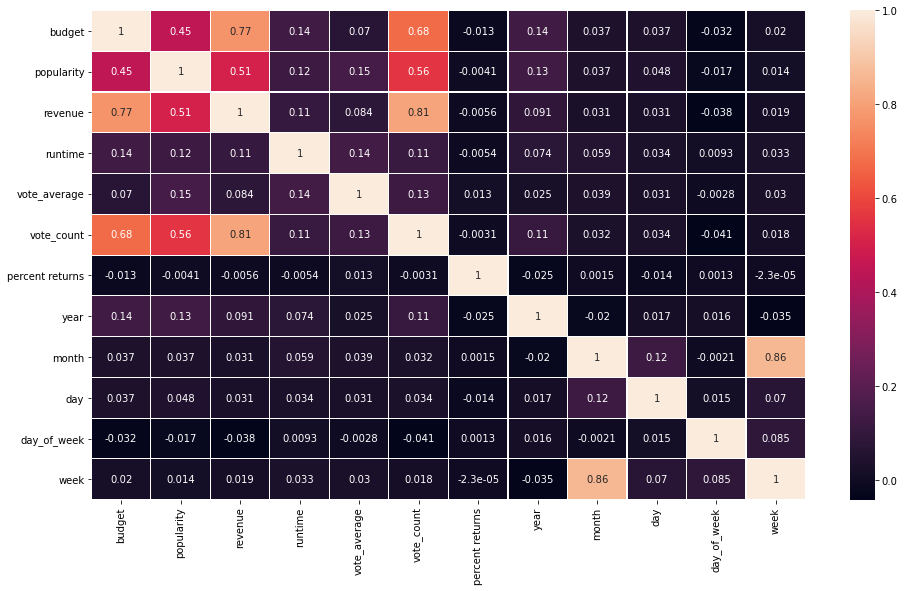

In [31]:
heatmap, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(kaggleMovies.corr(), annot=True, linewidths = 0.1)

Lets cut down the heatmap to it's most important correlations for ease of viewing

As a note, the heatmap is mirrored across the diagonal filled with ones. This means that every box above or below the diagonal can be erased without losing any information.

<AxesSubplot:>

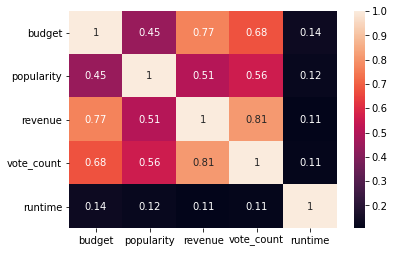

In [32]:
heatmapdb = kaggleMovies[['budget','popularity', 'revenue', 'vote_count','runtime']]
sns.heatmap(heatmapdb.corr(), annot = True, linewidths = 0)

I use the below configuration as a tool to display the correlation between two columns for every genre

Open up the resulting graph in a new window and zoom in

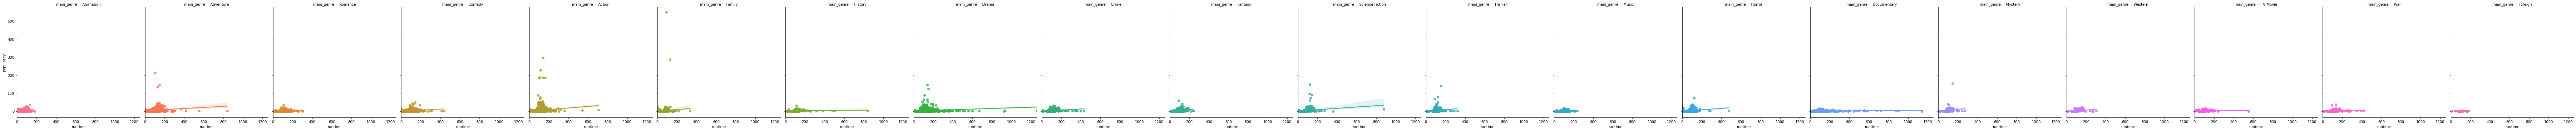

In [33]:
sns.lmplot(data = kaggleMovies
          , x = 'runtime'
          , y = 'popularity'
          , col = 'main_genre'
          , hue = 'main_genre'
          , truncate = True
          , )

Changed seaborn settings to match project style

In [34]:
sns.set_theme(style="darkgrid")
new_palette = ['#00B799']
sns.set_palette(new_palette)

So far, I have noticed that there is a strong correlation between the revenue and the general popularity of the movie. As the revenue increases, due to people buying tickets or home media, the amount of reviews increase, which in turn inspires more people to watch the movie. This is a vicious cycle that ends mainly due to the target audience being depleted. Advertising could puch up both the popularity and the

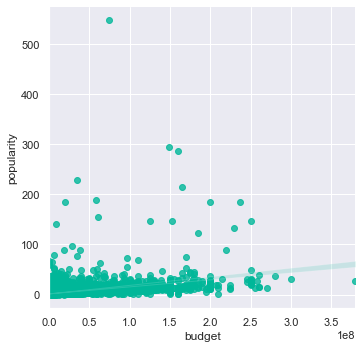

In [35]:
sns.lmplot(data = kaggleMovies,
          x = 'budget',
          y = 'popularity')
# Family
# Science Fiction
# Action

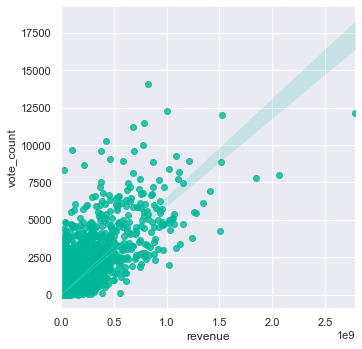

In [36]:
sns.lmplot(data = kaggleMovies,
          x = 'revenue',
          y = 'vote_count')
# Drama
# Science Fiction
# Action

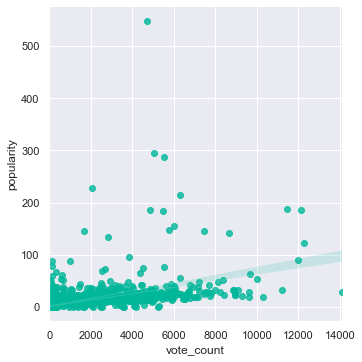

In [37]:
sns.lmplot(data = kaggleMovies,
          x = 'vote_count',
          y = 'popularity')
# Family
# Mystery
# Action

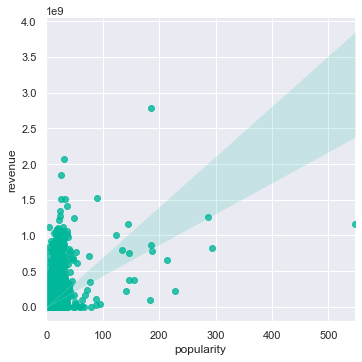

In [38]:
sns.lmplot(data = kaggleMovies,
          x = 'popularity',
          y = 'revenue')
# Adventure
# Action
# Family

I used the lmplot below the heatplot to find which genres have the highest correlation for each of the above four plots. The only genre in the top three of every plot is 'Action', so I will consider it the primary reccomended genre from the above.

Before we continue, I would like to find a litle information on runtime. Aulthough it's correlation is low, it is still above 10% which is no small contribution. Using the lmplot below the heatmap for this purpose, we see that movies longer that two hours do not have a large return, with that time period slightly extending the more serious the genre. Drama has the highest limit at 220 minutes, almost 4 hours. Documentaries appear to be the exception with no time limit, but suffer from the second lowest returns after the Foreign category.

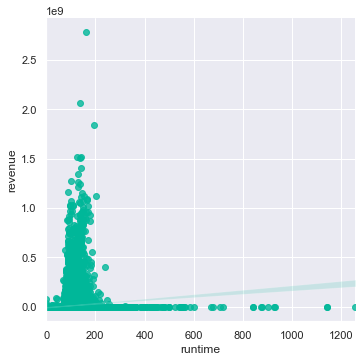

In [39]:
sns.lmplot(data = kaggleMovies,
          x = 'runtime',
          y = 'revenue')

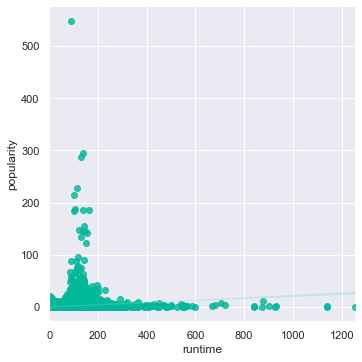

In [40]:
sns.lmplot(data = kaggleMovies,
          x = 'runtime',
          y = 'popularity')

# Conclusions

General
* here

Business Recommendations:
* Make **Action** and **Animated** movies a main part of your repertoire.
* For the above genres, releasing the films in the summer months (esp. May) is optimal.
* When choosing what types and how to go about making a given movie, use the aforementioned movies (with highest “bang for your buck”) as a reference.



# Next Steps

next steps